# Convolutional neural networks

In class, we have briefly reviewed the idea of learning good features directly from data and went through the concept of convolutional neural networks along with few architectures.

Until recently, building convolutional neural networks was tough. There was no high-level tools for that, you would be required to understand all the internal mechanics of the model and its operations.

Today, due to the high-level tools such as Keras and TensorFlow, everybody can build a convolutional neural network and put it to work without diving deep into them. What used to be a one-month project became a few hours exercise.


In [227]:
import pickle
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import os

## Loading the images

In [228]:
train_images, train_labels = pickle.load(open('data/train_set_all.pkl', 'rb'))
cv_images, cv_labels = pickle.load(open('data/test_set_all.pkl', 'rb'))

In [229]:
print(train_images.shape)
print(len(train_labels))

(50000, 32, 32, 3)
50000


In [230]:
print(cv_images.shape)
print(len(cv_labels))

(10000, 32, 32, 3)
10000


In [231]:
print(train_labels[0:10])

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3]


In [232]:
# functions to save and load model weights
def load_model(model_name, model):
    dir = os.path.join(os.getcwd(), 'saved_models')
    if not os.path.isdir(save_dir):
        return None
    model_path = os.path.join(save_dir, model_name)
    model.load_weights(model_path)
    return model
    
def save_model(model_name, model):
    save_dir = os.path.join(os.getcwd(), 'saved_models')
    # Save model and weights
    if not os.path.isdir(save_dir):
        os.makedirs(save_dir)
    model_path = os.path.join(save_dir, model_name)
    model.save(model_path)
    print('Saved trained model at %s ' % model_path)
    
# def get_model_with_weights(model_func, need_to_train = False):
#     model = model_func()
#     if need_to_train == True:
#         model.fit(train_images, Y_train, 
#               batch_size=32, nb_epoch=10, verbose=1)
#         save_model(model_name = 'model_for_mnist')
#     else:
#         model = load_model('model_for_mnist', model)
#     return model

def print_model_results(model):
    score = model.evaluate(cv_images, Y_cv, batch_size=32, verbose=1)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print(model.metrics_names)
    print(score)

In [233]:
def show_image(np_array):
    %matplotlib inline
    plt.figure()
    plt.imshow(np_array)

In [234]:
def show_example(data_set, labels, example_index):
    show_image(data_set[example_index])
    print('Label: ', labels[example_index])

Label:  6


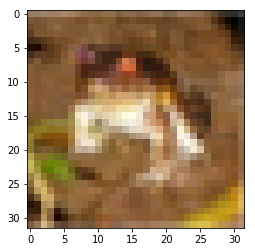

In [235]:
show_example(train_images, train_labels, example_index = 0)

Label:  3


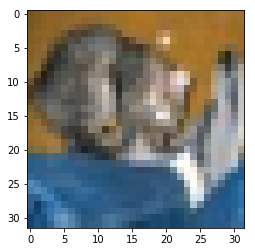

In [236]:
show_example(cv_images, cv_labels, example_index = 0)

## Building AlexNet

In 2012 a convolutional neural network called AlexNet won ImageNet competition. 

Go through an [original AlexNet paper](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf) to investigate the architecture. Next, investigate the [basics of Keras](https://keras.io/#keras-the-python-deep-learning-library). We will use it with TensorFlow backend.

You are also encouraged to go through some CNN tutorial for Keras. There is a number of them online (for example, [this](https://elitedatascience.com/keras-tutorial-deep-learning-in-python) or [this](https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/)).
Now, build AlexNex network with Keras for object recognition. Note that standard AlexNet works with 224x224 input images. The dataset you are going to use for this problem is 32x32.

## Training AlexNet

Use training set for training the network to recognize objects. You might want to use RMSProp optimizer to speed up the training.

Convolutional networks require a lot of computing power for training. Typical setup for training CNN is to use GPU, however, in this problem you are not required to do so. CPU will be fine as well.

If you are using CPU for this subproblem, training process might be slow. You can stop it manually as soon as you get meaningful results.

Report the results on the training and cross-validation sets. The report should contain the training logs.

In [237]:
# preprocessing input data

train_images = train_images.reshape(train_images.shape[0], 3, 32, 32)
cv_images = cv_images.reshape(cv_images.shape[0], 3, 32, 32)
print(train_images.shape)

train_images = train_images.astype('float32')
cv_images = cv_images.astype('float32')
train_images /= 255
cv_images /= 255

# print(len(train_labels))
# print (train_labels[:10])
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(train_labels, 10)
Y_cv = np_utils.to_categorical(cv_labels, 10)
print (Y_train.shape)

(50000, 3, 32, 32)
(50000, 10)


In [238]:
# try model from https://elitedatascience.com/keras-tutorial-deep-learning-in-python
# this model is suggested for MNIST dataset actually
def create_mnist_model(need_to_train = False):
    model = Sequential()

    model.add(Convolution2D(32, 3, 3, dim_ordering="th", activation='relu', input_shape=(3,32,32)))
    model.add(Convolution2D(32, 3, 3, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    print (model.output_shape)

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    if need_to_train == True:
        model.fit(train_images, Y_train, 
              batch_size=32, nb_epoch=10, verbose=1)
        save_model(model_name = 'model_for_mnist')
    else:
        model = load_model('model_for_mnist', model)
        
    return model

In [239]:
# mnist_model = create_mnist_model()

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(3, 32, 32..., data_format="channels_first")`
  
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys


(None, 10)


In [240]:
# print_model_results(mnist_model)

10000/10000 [==============================] - 20s 2ms/step
Test loss: 2.3164710067749024
Test accuracy: 0.1
['loss', 'acc']
[2.3164710067749024, 0.1]


In [241]:
# score = model.evaluate(cv_images, Y_cv, batch_size=32, verbose=1)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])
# print(model.metrics_names)
# print(score)

In [246]:
epochs = 50

In [ ]:
# https://engmrk.com/alexnet-implementation-using-keras/

# Instantiate an empty model
# def create_alexnet_model(need_to_train = False):
#     model = Sequential()

#     # 1st Convolutional Layer
#     model.add(Conv2D(filters=96, 
#                      input_shape=train_images.shape[1:], 
#                      data_format = 'channels_first', 
#                      kernel_size=(5,5), 
#                      strides=(4,4), 
#                      padding='valid'))
#     model.add(Activation('relu'))
#     # Max Pooling
#     model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

#     # 2nd Convolutional Layer
#     model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
#     model.add(Activation('relu'))
#     # Max Pooling
#     model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

#     # 3rd Convolutional Layer
#     model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
#     model.add(Activation('relu'))

#     # 4th Convolutional Layer
#     model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
#     model.add(Activation('relu'))

#     # 5th Convolutional Layer
#     model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
#     model.add(Activation('relu'))
#     # Max Pooling
#     model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

#     # Passing it to a Fully Connected layer
#     model.add(Flatten())
#     # 1st Fully Connected Layer
#     model.add(Dense(4096, input_shape=(32*32*3,)))
#     model.add(Activation('relu'))
#     # Add Dropout to prevent overfitting
#     model.add(Dropout(0.4))

#     # 2nd Fully Connected Layer
#     model.add(Dense(4096))
#     model.add(Activation('relu'))
#     # Add Dropout
#     model.add(Dropout(0.4))

#     # 3rd Fully Connected Layer
#     model.add(Dense(1000))
#     model.add(Activation('relu'))
#     # Add Dropout
#     model.add(Dropout(0.4))

#     # Output Layer
#     model.add(Dense(17))
#     model.add(Activation('softmax'))

#     model.summary()

#     # Compile the model
#     model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=["accuracy"])
    
#     if need_to_train == True:
#         model.fit(train_images, Y_train, 
#               batch_size=32, nb_epoch=10, verbose=1)
#         save_model(model_name = 'alexnet_model')
#     else:
#         model = load_model('alexnet_model', model)

#     return model


# https://github.com/jkh911208/cswithjames/blob/master/8_CIFAR10_alexnet.py
def create_alexnet_model(need_to_train = False):
    # AlexNet Define the Model
    model = Sequential()
    # model.add(Conv2D(96, (11,11), strides=(4,4), activation='relu', padding='same', input_shape=(img_height, img_width, channel,)))
    # for original Alexnet
    model.add(Conv2D(96, (3,3), strides=(2,2), activation='relu', 
                     padding='same', 
                     input_shape=train_images.shape[1:], 
                     data_format = 'channels_first'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    # Local Response normalization for Original Alexnet
    model.add(BatchNormalization())

    model.add(Conv2D(256, (5,5), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
    # Local Response normalization for Original Alexnet
    model.add(BatchNormalization())

    model.add(Conv2D(384, (3,3), activation='relu', padding='same'))
    model.add(Conv2D(384, (3,3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
    # Local Response normalization for Original Alexnet
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(4096, activation='tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))


    # print the model summary
    model.summary()

    # determine Loss function and Optimizer
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    if need_to_train == True:
        model.fit(train_images, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(cv_images, Y_cv),
                    shuffle=True)
        save_model(model_name = 'alexnet_model')
    else:
        model = load_model('alexnet_model', model)

    return model_name

    # Train the Model

   

In [248]:
alexnet_model = create_alexnet_model(True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_133 (Conv2D)          (None, 96, 16, 16)        2688      
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 48, 8, 16)         0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 48, 8, 16)         64        
_________________________________________________________________
conv2d_134 (Conv2D)          (None, 48, 8, 256)        102656    
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 23, 3, 256)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 23, 3, 256)        1024      
_________________________________________________________________
conv2d_135 (Conv2D)          (None, 23, 3, 384)        885120    
__________

KeyboardInterrupt: 

In [ ]:
print_model_results(alexnet_model)

## Improving AlexNet

As you can see, AlexNet does not work very well on such a small dataset. Recall what you have learned from this class to improve its performance. You can also take a look at the [Dropout technique](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf) and its [implementation in Keras](https://keras.io/layers/core/#dropout). 

In [249]:
def create_model_for_cifar(need_to_train = False):
    batch_size = 32
    num_classes = 10
    epochs = 50
    
    model = Sequential()
    model.add(Conv2D(32, (3, 3), 
                     padding='same', 
                     data_format = 'channels_first', 
                     input_shape=train_images.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    # initiate RMSprop optimizer
    opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

    # Let's train the model using RMSprop
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    
    if need_to_train == True:
        model.fit(train_images, Y_train, 
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(cv_images, Y_cv),
              shuffle=True)
        save_model(model_name = 'model_for_cifar')
    else:
        model = load_model('model_for_cifar', model)
    
    return model
    
    

In [ ]:
cifar_model = create_model_for_cifar(need_to_train = True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 186s 4ms/step - loss: 2.1000 - acc: 0.2266 - val_loss: 1.9415 - val_acc: 0.3046
Epoch 2/50
50000/50000 [==============================] - 177s 4ms/step - loss: 1.8915 - acc: 0.3196 - val_loss: 1.7655 - val_acc: 0.3684
Epoch 3/50
50000/50000 [==============================] - 176s 4ms/step - loss: 1.7520 - acc: 0.3682 - val_loss: 1.6453 - val_acc: 0.3996
Epoch 4/50
50000/50000 [==============================] - 176s 4ms/step - loss: 1.6443 - acc: 0.4086 - val_loss: 1.5697 - val_acc: 0.4316
Epoch 5/50
50000/50000 [==============================] - 176s 4ms/step - loss: 1.5791 - acc: 0.4313 - val_loss: 1.4963 - val_acc: 0.4641
Epoch 6/50
50000/50000 [==============================] - 176s 4ms/step - loss: 1.5277 - acc: 0.4529 - val_loss: 1.4633 - val_acc: 0.4682
Epoch 7/50
50000/50000 [==============================] - 182s 4ms/step - loss: 1.4889 - acc: 0.4670 - val_loss: 1.4534 - 

In [ ]:
print_model_results(cifar_model)